原始需求的是做一个地铁线路路径规划，但是我网上搜了下发现，一是太多人做过类似的了有限的时间内我不可能做的比他们更好，二是上海地铁的经纬度信息好像只能通过调用地图软件的api获得。主要还是时间有限所以这次决定另辟蹊径。

大航海时代是我一直以来都非常喜欢的一款游戏，游戏的流程多为从西地中海展开。

因为航海过程中会消耗食物和水，所以不能一直航行下去必须航行一段距离之后靠港补给。符合我们路径规划的逻辑。

In [19]:
from imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline

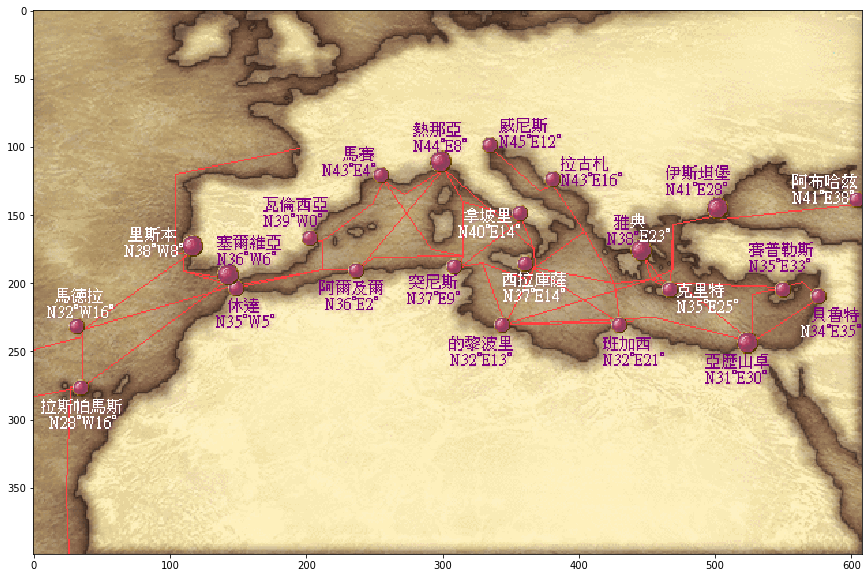

In [22]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) 
img = imread("大航海时代.jpg")
plt.imshow(img,zorder=0)

让我们再看一下谷歌地图上是怎么样的

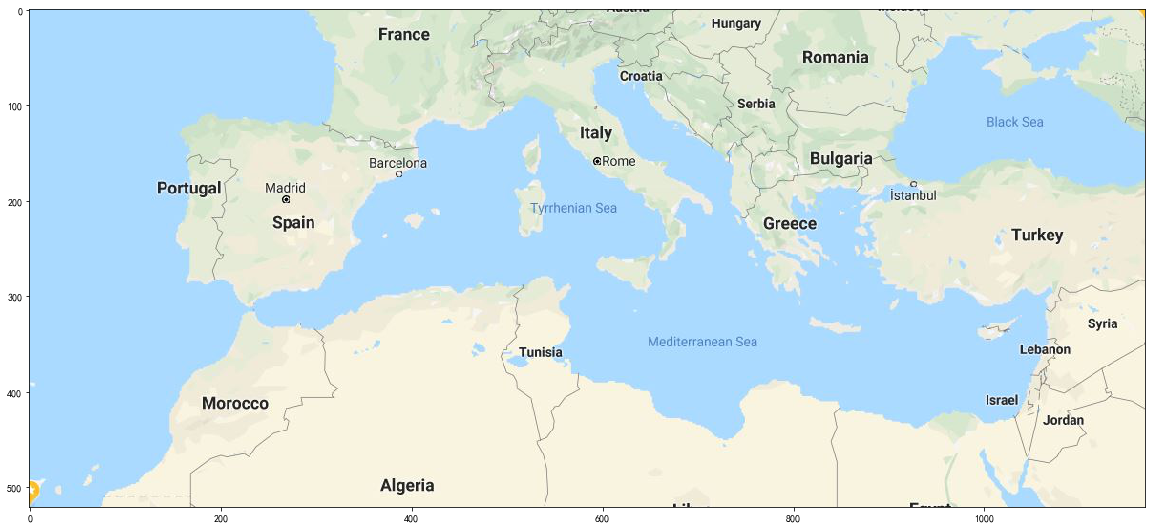

In [43]:
img = imread("谷歌地图.jpg")
plt.imshow(img,zorder=0)

这张图左下角的黄点是用谷歌地图标注经纬度(-17，27)的位置，右上角的黄点是地图标注(41，47)的位置。可以看到游戏里的地图和真实的世界地图还是有蛮大差距的。尝试将游戏地图中的几座城市按照经纬度在谷歌地图中标出，并把城市间的路线描绘出来。

首先将游戏地图中的经纬度输入字典。查了一下游戏地图中的经纬度和谷歌地图中的误差不大，这里直接输入最便捷。

In [48]:
#我们的输入按照经度，纬度的顺序这样方便之后映射到坐标轴x轴y轴
city_info={
    '拉斯帕马斯':(-16,28),
    '马德拉':(-16,32),
    '里斯本':(-8,38),
    '塞维利亚':(-6,36),
    '休达':(-5,35),
    '瓦伦西亚':(0,39),
    '阿尔及尔':(2,36),
    '马赛':(4,43),
    '热那亚':(8,44),
    '突尼斯':(9,37),
    '威尼斯':(12,45),
    '的黎波里':(13,32),
    '那不勒斯':(14,40),
    '锡拉库萨':(14.1,37),
    '拉斯帕马斯':(-16,28),
    '拉古萨':(16,43),
    '班加西':(21,32),
    '雅典':(23,38),
    '克里特':(25,35),
    '伊斯坦堡':(28,41),
    '亚历山大':(30,31),
    '塞浦路斯':(33,35),
    '贝鲁特':(35,34),
    '阿布哈兹':(38,41),
}

In [25]:
import math
#输入两组坐标，返回坐标之间的haversine distance。
def geo_distance(origin, destination):
    lon1, lat1 = origin
    lon2, lat2 = destination
    #地球半径6371km
    radius = 6371  
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [58]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("马德拉","里斯本")

987.2244611886175

In [59]:
get_city_distance("马德拉","塞维利亚")

1022.8097066565429

In [60]:
get_city_distance("马德拉","休达")

1072.4162263547425

In [28]:
import networkx as nx
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

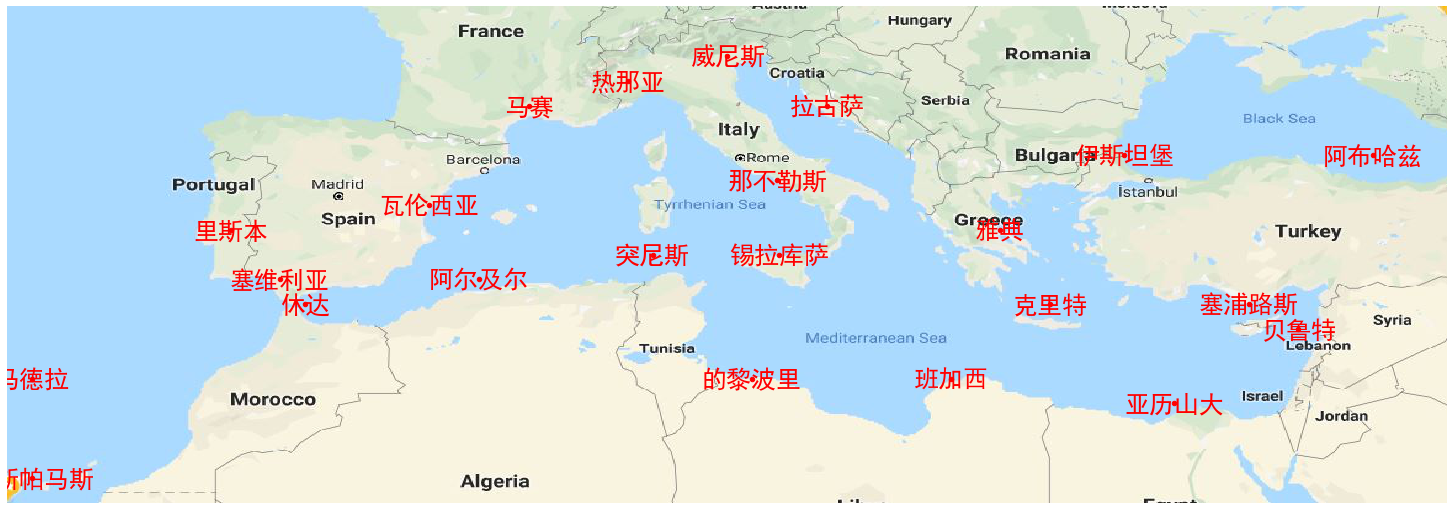

In [49]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph, city_info, with_labels=True, node_size=20,font_size =25,font_color ='red',node_color='red')
img = imread("谷歌地图.jpg")
#地图左下角(-17,27),右上角(41，47)
plt.imshow(img,zorder=0,extent=[-17, 41, 27, 47])

可以看出地理位置是有一些偏差，不过问题不大。接着我们把路线画出来。

In [52]:
from collections import defaultdict
def build_connection(city_info,threshold):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            #若两个港口距离小于threshold，则存在通路
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

In [61]:
cities_connection = build_connection(city_info,1000)
print(cities_connection)

defaultdict(<class 'list'>, {'拉斯帕马斯': ['马德拉'], '马德拉': ['拉斯帕马斯', '里斯本'], '里斯本': ['马德拉', '塞维利亚', '休达', '瓦伦西亚', '阿尔及尔'], '塞维利亚': ['里斯本', '休达', '瓦伦西亚', '阿尔及尔'], '休达': ['里斯本', '塞维利亚', '瓦伦西亚', '阿尔及尔'], '瓦伦西亚': ['里斯本', '塞维利亚', '休达', '阿尔及尔', '马赛', '热那亚', '突尼斯'], '阿尔及尔': ['里斯本', '塞维利亚', '休达', '瓦伦西亚', '马赛', '突尼斯'], '马赛': ['瓦伦西亚', '阿尔及尔', '热那亚', '突尼斯', '威尼斯', '那不勒斯', '拉古萨'], '热那亚': ['瓦伦西亚', '马赛', '突尼斯', '威尼斯', '那不勒斯', '锡拉库萨', '拉古萨'], '突尼斯': ['瓦伦西亚', '阿尔及尔', '马赛', '热那亚', '威尼斯', '的黎波里', '那不勒斯', '锡拉库萨', '拉古萨'], '威尼斯': ['马赛', '热那亚', '突尼斯', '那不勒斯', '锡拉库萨', '拉古萨'], '的黎波里': ['突尼斯', '那不勒斯', '锡拉库萨', '班加西'], '那不勒斯': ['马赛', '热那亚', '突尼斯', '威尼斯', '的黎波里', '锡拉库萨', '拉古萨', '雅典'], '锡拉库萨': ['热那亚', '突尼斯', '威尼斯', '的黎波里', '那不勒斯', '拉古萨', '班加西', '雅典'], '拉古萨': ['马赛', '热那亚', '突尼斯', '威尼斯', '那不勒斯', '锡拉库萨', '雅典'], '班加西': ['的黎波里', '锡拉库萨', '雅典', '克里特', '亚历山大'], '雅典': ['那不勒斯', '锡拉库萨', '拉古萨', '班加西', '克里特', '伊斯坦堡', '塞浦路斯'], '克里特': ['班加西', '雅典', '伊斯坦堡', '亚历山大', '塞浦路斯', '贝鲁特'], '伊斯坦堡': ['雅典', '克里特', '塞浦路斯', '贝鲁特', '阿布哈兹'], '亚历山大': 

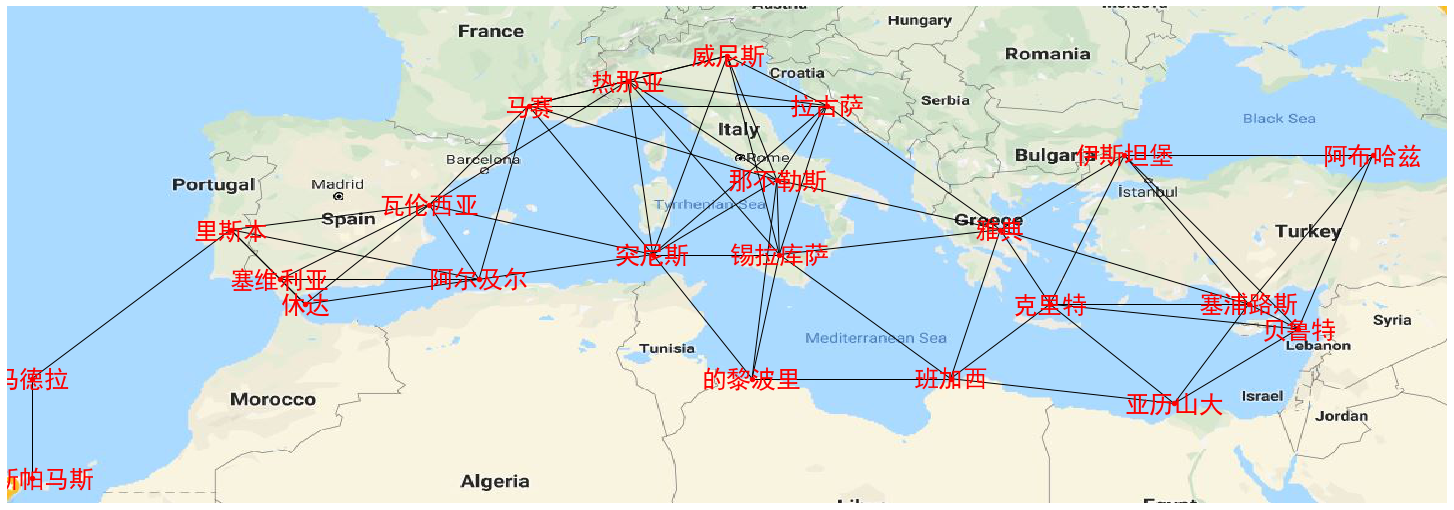

In [62]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_info, with_labels=True, node_size=20,font_size =25,font_color ='red',node_color='red')
img = imread("谷歌地图.jpg")
#地图左下角(-17,27),右上角(41，47)
plt.imshow(img,zorder=0,extent=[-17, 41, 27, 47])

图中存在的一个问题是我们计算港口之间的距离是haversine distance，这个距离没有考虑到陆路和水路的问题。其实设计复杂的距离计算函数，或者采用调整的曼哈顿距离可以一定程度上解决这个问题。但是时间有限我这里就偷懒了（毕竟游戏里也可以把船放到背包里走陆路嘛233）

接下来就是search agent啦。我们做两个search agent，第一个寻找距离最短的路径，第二个寻找经过港口最少的路径。

In [70]:
def search(graph,start,destination,search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successsors = graph[froniter]      
        for city in successsors:
            if city in path: continue            
            new_path = path+[city]           
            pathes.append(new_path)           
        pathes = search_strategy(pathes)
        if pathes and (destination == pathes[0][-1]):
    
            print('路径距离为%d公里'%get_distance_of_path(pathes[0]))
            return pathes[0]  
    print('不存在%s到%s的路径'%(start,destination)

这个search函数可以按传入的search_strategy不同，计算出距离最短的路径或者经过港口最少的路径

In [74]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [75]:
#距离最短
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

In [81]:
#经过港口最少
def sort_by_num(pathes):
    return sorted(pathes,key=len)

In [87]:
search(cities_connection,"里斯本","伊斯坦堡",search_strategy=sort_by_distance)

路径距离为3312公里


['里斯本', '瓦伦西亚', '突尼斯', '锡拉库萨', '雅典', '伊斯坦堡']

In [88]:
search(cities_connection,"里斯本","伊斯坦堡",search_strategy=sort_by_num)

路径距离为3510公里


['里斯本', '瓦伦西亚', '马赛', '那不勒斯', '雅典', '伊斯坦堡']

实在想不到距离最短但不是经过港口最少的例子。。。那就这样吧。也不去和谷歌地图比较了，因为现实世界中港口很多。后续要拓展的话，还可以考虑给港口添加国家属性，航行途中避开特定国家的港口，或者是直接避开某几个港口经过某一个港口。这次就这样吧。